### Importing libraries

In [302]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from scipy.spatial.distance import euclidean, cosine

### Data Analysis

#### Load the data from supplied data file. Print the data dimension

In [303]:
data=pd.read_csv(r"C:\Users\User\Desktop\Class Folder\720\development-activity-monitor.csv")

In [304]:
data.shape

(1424, 42)

#### Display the data type of all features. If the data type is integer, print the median values of the features. 

In [305]:
data.dtypes

data_format                     object
development_key                 object
status                          object
year_completed                 float64
clue_small_area                 object
clue_block                       int64
street_address                  object
property_id                      int64
property_id_2                  float64
property_id_3                  float64
property_id_4                  float64
property_id_5                  float64
floors_above                     int64
resi_dwellings                   int64
studio_dwe                       int64
one_bdrm_dwe                     int64
two_bdrm_dwe                     int64
three_bdrm_dwe                   int64
student_apartments               int64
student_beds                     int64
student_accommodation_units      int64
institutional_accom_beds         int64
hotel_rooms                      int64
serviced_apartments              int64
hotels_serviced_apartments       int64
hostel_beds              

In [306]:
for i in range(data.shape[1]):
    if ((data.iloc[:,i]).dtype == 'int64'):
        print(f"median of {data.columns[i]} is {data.iloc[:,i].median()} ")

median of clue_block is 432.0 
median of property_id is 109147.0 
median of floors_above is 8.0 
median of resi_dwellings is 4.0 
median of studio_dwe is 0.0 
median of one_bdrm_dwe is 0.0 
median of two_bdrm_dwe is 0.0 
median of three_bdrm_dwe is 0.0 
median of student_apartments is 0.0 
median of student_beds is 0.0 
median of student_accommodation_units is 0.0 
median of institutional_accom_beds is 0.0 
median of hotel_rooms is 0.0 
median of serviced_apartments is 0.0 
median of hotels_serviced_apartments is 0.0 
median of hostel_beds is 0.0 
median of childcare_places is 0.0 
median of office_flr is 0.0 
median of retail_flr is 0.0 
median of industrial_flr is 0.0 
median of storage_flr is 0.0 
median of education_flr is 0.0 
median of hospital_flr is 0.0 
median of recreation_flr is 0.0 
median of publicdispaly_flr is 0.0 
median of community_flr is 0.0 
median of car_spaces is 0.0 
median of bike_spaces is 0.0 


####  Print all the possible values of the feature “status” and calculate the ratio of each “status” value. 

In [307]:
data.head()

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000479,COMPLETED,2006.0,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,NaN,NaN,...,0,0,0,0,0,0,0,144.945030,-37.802822,"-37.80282184, 144.9450298"
1,Pre May 16,X000459,COMPLETED,2005.0,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,NaN,NaN,...,0,0,0,0,0,0,0,144.945948,-37.802049,"-37.80204879, 144.9459475"
2,Pre May 16,X000573,COMPLETED,2013.0,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,NaN,NaN,...,0,0,0,0,0,0,0,144.944719,-37.806791,"-37.80679128, 144.9447186"
3,Pre May 16,X000563,COMPLETED,2014.0,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,NaN,NaN,...,0,0,0,0,0,28,0,144.942096,-37.806072,"-37.80607242, 144.9420962"
4,Pre May 16,X000997,COMPLETED,2007.0,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,NaN,NaN,...,0,0,0,0,0,0,0,144.939286,-37.800374,"-37.80037382, 144.9392856"


In [308]:
data.shape

(1424, 42)

In [309]:
uni_status=np.unique(data["status"])
uni_status

array(['APPLIED', 'APPROVED', 'COMPLETED', 'UNDER CONSTRUCTION'],
      dtype=object)

In [310]:
values=data['status'].value_counts()
sorted_values= values.sort_index()

In [311]:
uni=np.unique(data["status"])
for i in range (len(uni)):
    print(f"The ratio of {uni[i]} is {sorted_values[i]/sum(values)}")

The ratio of APPLIED is 0.06671348314606741
The ratio of APPROVED is 0.1720505617977528
The ratio of COMPLETED is 0.6973314606741573
The ratio of UNDER CONSTRUCTION is 0.06390449438202248


In [312]:
data['status']

0                COMPLETED
1                COMPLETED
2                COMPLETED
3                COMPLETED
4                COMPLETED
               ...        
1419    UNDER CONSTRUCTION
1420    UNDER CONSTRUCTION
1421    UNDER CONSTRUCTION
1422    UNDER CONSTRUCTION
1423    UNDER CONSTRUCTION
Name: status, Length: 1424, dtype: object

In [313]:
data['property_id']

0       100023
1       100119
2       100144
3       100441
4       100556
         ...  
1419    636830
1420    108056
1421    105720
1422    105631
1423    102725
Name: property_id, Length: 1424, dtype: int64

In [314]:
from sklearn.metrics import  normalized_mutual_info_score
normalized_mutual_info_score(data['status'], data['clue_small_area'])

0.023280182023912004

#### Association between 'clue small area' and 'status':
* Under clue small area, the areas that have the largest number of properties that have completed. 
* From the mutual information score calculated between the two features, I can conclude that the relationship between status and clue_small_area is quite weak even for a highly dimensional dataset such as this one. 
* A theoretical association between the two could determine under which area most proterties have the majority of the respective statuses with respect to the number of properties in the area.

#### Number of properties for different suburbs.

In [315]:
data['clue_small_area'].value_counts()

Melbourne (CBD)                 334
Docklands                       198
North Melbourne                 186
Carlton                         137
Southbank                       133
West Melbourne (Residential)    112
Kensington                       85
Port Melbourne                   78
Parkville                        61
East Melbourne                   42
West Melbourne (Industrial)      21
Melbourne (Remainder)            21
South Yarra                      16
Name: clue_small_area, dtype: int64

#### Patterns Found: 
* The areas surrounding the melbourne CBD such as Docklands, North Melbourne, Southbank, Carlton and the CBD itself contain the most number of properties. 
* The residentital part of west melbourne contains a high number of properties as people live there compared to the industrial area with fewer properties. 
* The areas furthurest away from the city contains the least amount of properties such as Parkville and South Yarra. 

#### which suburb has the biggest number of properties which are under construction?


In [316]:
uni_subs=np.unique(data['clue_small_area'])
under=[]
for i in range (len(data)):
    if (data["status"][i]=='UNDER CONSTRUCTION'):
        under.append(data['clue_small_area'][i])

In [317]:
under_dataframe=pd.DataFrame(under)
unique, counts = np.unique(under_dataframe, return_counts=True)

In [318]:
unique

array(['Carlton', 'Docklands', 'East Melbourne', ..., 'Southbank',
       'West Melbourne (Industrial)', 'West Melbourne (Residential)'],
      dtype=object)

In [319]:
counts

array([ 4,  9,  5, ...,  5,  1, 11], dtype=int64)

In [320]:
unique[np.argmax(counts)]

'Melbourne (CBD)'

#### which suburb has the biggest number of student apartments?


In [321]:
uni_subs=np.unique(data['clue_small_area'])
stud=[]
summ=0
for i in range (len(uni_subs)):
    summ=0
    for j in range (len(data)):
        if (uni_subs[i]==data['clue_small_area'][j]):
            summ=summ+data['student_apartments'][j]
    stud.append(summ)

In [322]:
stud

[7510, 0, 0, 0, 7283, 0, 1506, 606, 0, 0, 0, 0, 321]

In [323]:
uni_subs

array(['Carlton', 'Docklands', 'East Melbourne', ..., 'Southbank',
       'West Melbourne (Industrial)', 'West Melbourne (Residential)'],
      dtype=object)

In [324]:
uni_subs[np.argmax(stud)]

'Carlton'

#### Create and print a data frame of the number of different status values for different year groups (based on 5 years interval).


In [325]:
np.unique(data['year_completed'])

array([2002., 2003., 2004., ..., 2021., 2022.,   nan])

In [326]:
year_groups=["2000-2005","2006-2010","2011-2015","2016-2020","2021-2025"]
completed_nums=[]

In [327]:
summ=[0,0,0,0,0]
for j in range(len(data)):
    if (((data['year_completed'][j])>2000.0) & ((data['year_completed'][j])<2006.0)):
        summ[0]=summ[0]+1
    elif (((data['year_completed'][j])>2005.0) & ((data['year_completed'][j])<2011.0)):
        summ[1]=summ[1]+1
    elif (((data['year_completed'][j])>2010.0) & ((data['year_completed'][j])<2016.0)):
        summ[2]=summ[2]+1
    elif (((data['year_completed'][j])>2015.0) & ((data['year_completed'][j])<2021.0)):
        summ[3]=summ[3]+1
    elif (((data['year_completed'][j])>2020.0) & ((data['year_completed'][j])<2026.0)):
        summ[4]=summ[4]+1

In [328]:
summ
col={"Year_Groups" : year_groups,"Completed_Total" : summ }

In [329]:
new_data= pd.DataFrame(col)

In [330]:
new_data

,Year_Groups,Completed_Total
0,2000-2005,149
1,2006-2010,243
2,2011-2015,292
3,2016-2020,241
4,2021-2025,68


#### A histogram of number of status values against different year groups.


<BarContainer object of 5 artists>

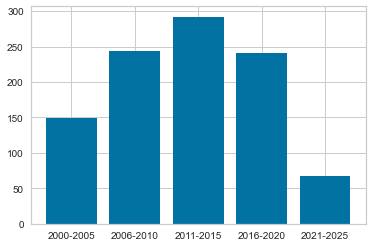

In [331]:
plt.bar(year_groups, summ)

#### Alanysis: 
* From the Histogram, it can be clearly noted that from the year 2011-2015, most of the properties were completed. 
* There has been an overall decrease in the completion of properties from the year group 2000-2005 to 2021-2025

#### Based on the original dataset, exclude the clue_small_area feature, use the rest available features and perform clustering on all the properties and determine the number of clusters.


In [332]:
n_data=data.drop('clue_small_area',axis=1)

#### Label Encoding the string data in the dataset

In [333]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
n_data["development_key"] = label_encoder.fit_transform(n_data['development_key'])
n_data["status"] = label_encoder.fit_transform(n_data['status'])
n_data["town_planning_application"] = label_encoder.fit_transform(n_data['town_planning_application'])
n_data["data_format"] = label_encoder.fit_transform(n_data['data_format'])
n_data["street_address"] = label_encoder.fit_transform(n_data['street_address'])
n_data["geopoint"] = label_encoder.fit_transform(n_data['geopoint'])
n_data["clue_block"] = label_encoder.fit_transform(n_data['clue_block']) # unique identifier
n_data["property_id"] = label_encoder.fit_transform(n_data['property_id']) # unique identifier

In [334]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data=imp.fit_transform(n_data)

In [335]:
# Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values. 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
silouette_values=[]
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14,15]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(imputed_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(imputed_data, cluster_labels)
    silouette_values.append(silhouette_score(imputed_data, cluster_labels))
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.9218744457771927
For n_clusters = 3 The average silhouette_score is : 0.893286982709299
For n_clusters = 4 The average silhouette_score is : 0.9012308420229768
For n_clusters = 5 The average silhouette_score is : 0.9109259230745754
For n_clusters = 6 The average silhouette_score is : 0.9254764498256866
For n_clusters = 7 The average silhouette_score is : 0.9277950172224734
For n_clusters = 8 The average silhouette_score is : 0.932112462571412
For n_clusters = 9 The average silhouette_score is : 0.9323245175537551
For n_clusters = 10 The average silhouette_score is : 0.9331385009218566
For n_clusters = 11 The average silhouette_score is : 0.8768829172427629
For n_clusters = 12 The average silhouette_score is : 0.8715724545327229
For n_clusters = 13 The average silhouette_score is : 0.871893480987058
For n_clusters = 14 The average silhouette_score is : 0.8717448460703169
For n_clusters = 15 The average silhouette_score is : 0.875953

 The ideal number of clusters from above can be clearly inferred to be 10.

In [336]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
truth = label_encoder.fit_transform(data['clue_small_area'])
np.unique(truth)

array([ 0,  1,  2, ..., 10, 11, 12])

From above it can be inferred that there are 13 unique suburbs in the dataset and the ideal number of clusters come out to be 10. Therefore they are not the same. 

#### perform K-Means and Hierarchical clustering on the data set, report the purity score. 

#### K-Means

In [337]:
clusterer = KMeans(n_clusters=10, random_state=0)
cluster_labels = clusterer.fit_predict(imputed_data)

In [338]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
print(
    "purity_score: %0.3f"
    % purity_score(truth, cluster_labels)
)

purity_score: 0.247


In [339]:
np.unique(cluster_labels)

array([0, 1, 2, ..., 7, 8, 9])

#### Hierarchial Clustering

In [340]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [341]:
model = AgglomerativeClustering(compute_distances=True,linkage="complete", affinity="cosine",n_clusters=10)
model = model.fit(imputed_data)

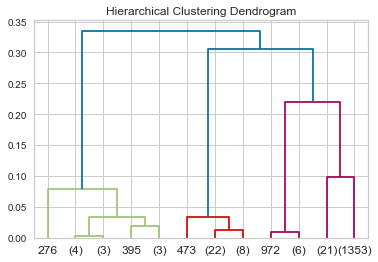

In [342]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)

In [343]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [344]:
print(
    "purity_score: %0.3f"
    % purity_score(truth, model.labels_)
)

purity_score: 0.247


In [345]:
np.set_printoptions(threshold=3)

#### 12. Three different distance metrics for K-Means and Hierarchical clustering, select the best distance metric for each corresponding clustering algorithm. 

For K means

In [346]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
intializer=kmeans_plusplus_initializer(imputed_data,10).initialize()

MANHATTEN Distance

In [347]:
import pyclustering
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.encoder import cluster_encoder
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
manhattan_metric = distance_metric(type_metric.MANHATTAN)
kmeans_instance = kmeans(imputed_data, initial_centers=intializer, metric=manhattan_metric)
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
pyEncoding = kmeans_instance.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, clusters, imputed_data)
# change representation from index list to label list
pyLabels = pyEncoder.set_encoding(pyclustering.cluster.encoder.type_encoding.CLUSTER_INDEX_LABELING.value).get_clusters()

In [348]:
np.unique(pyLabels)

array([0, 1, 2, ..., 7, 8, 9])

In [349]:
print(
    "purity_score: %0.3f"
    % purity_score(truth, pyLabels)
)

purity_score: 0.247


EUCLIDEAN distance

In [354]:
manhattan_metric = distance_metric(type_metric.EUCLIDEAN)
kmeans_instance = kmeans(imputed_data, initial_centers=intializer, metric=manhattan_metric)
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
pyEncoding = kmeans_instance.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, clusters, imputed_data)
# change representation from index list to label list
pyLabels = pyEncoder.set_encoding(pyclustering.cluster.encoder.type_encoding.CLUSTER_INDEX_LABELING.value).get_clusters()

In [356]:
print(
    "purity_score: %0.3f"
    % purity_score(truth, pyLabels)
)

purity_score: 0.247


CHEBYSHEV Distance

In [357]:
manhattan_metric = distance_metric(type_metric.CHEBYSHEV)
kmeans_instance = kmeans(imputed_data, initial_centers=intializer, metric=manhattan_metric)
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
pyEncoding = kmeans_instance.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, clusters, imputed_data)
# change representation from index list to label list
pyLabels = pyEncoder.set_encoding(pyclustering.cluster.encoder.type_encoding.CLUSTER_INDEX_LABELING.value).get_clusters()

In [358]:
print(
    "purity_score: %0.3f"
    % purity_score(truth, pyLabels)
)

purity_score: 0.247


From reviewing the above purity score, we can conlcude that all the distance metrics are equally viable as they all have the same purity score. 

#### Heirarchial Clustering

MANHATTEN Distance

In [359]:
model = AgglomerativeClustering(compute_distances=True,linkage="complete", affinity="manhattan",n_clusters=10)
model = model.fit(imputed_data)

In [360]:
print(
    "purity_score: %0.3f"
    % purity_score(truth, model.labels_)
)

purity_score: 0.248


EUCLIDEAN Distance

In [361]:
model = AgglomerativeClustering(compute_distances=True,linkage="complete", affinity="euclidean",n_clusters=2)
model = model.fit(imputed_data)
print(
    "purity_score: %0.3f"
    % purity_score(truth, model.labels_)
)

purity_score: 0.239


CHEBYSHEV Distance

In [362]:
model = AgglomerativeClustering(compute_distances=True,linkage="complete", affinity="chebyshev",n_clusters=2)
model = model.fit(imputed_data)
print(
    "purity_score: %0.3f"
    % purity_score(truth, model.labels_)
)

purity_score: 0.240


From reviewing the above purity scores for heirarchial clustering we can conclude that Manhattan distance is the best distance metrics for this dataset

#### DBSCAN clustering method, and compare the results. 

In [363]:
from sklearn.cluster import DBSCAN
silhouette_scores = []
for eps in range(10, 35):
    for min_samples in range(5, 25):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(imputed_data)
        labelsData = dbscan.labels_
        unique_label_num = len(set(labelsData))
        if unique_label_num > 1 & unique_label_num < len(imputed_data):
            try:
                score = silhouette_score(imputed_data, labelsData)
            except ValueError:
                raise

            silhouette_scores.append((score, eps, min_samples, unique_label_num,labelsData))

max_silhouette_score, optimal_eps, optimal_min_samples, optimal_n_label, labels_pre = max(silhouette_scores)[:]
print(f"Optimal eps: {optimal_eps}; Optimal min_samples: {optimal_min_samples}; optimal number of cluster: {optimal_n_label}")
print(f"the max silhouette score: {max_silhouette_score}")
print("the ground truth of labels :", len(set(truth)), "the labels_pre: ", len(set(labels_pre)))
print(
    "purity_score: %0.3f"
    % purity_score(truth, labels_pre)
)

Optimal eps: 30; Optimal min_samples: 6; optimal number of cluster: 2
the max silhouette score: 0.5789290319835195
the ground truth of labels : 13 the labels_pre:  2
purity_score: 0.239


Here the max silhouette score is very low compared to the ones obtained for K-means and Heirarchial clustering, but the purity scores appears to be lower but close. From this we can conclude that DBSCAN is not a good clustering method for this dataset. 